In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from tqdm import tqdm
from sklearn.metrics import log_loss, accuracy_score, precision_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer, make_column_selector
import os

In [46]:
hr = pd.read_csv("D:/Training/Academy/ML(Python)/Cases/human-resources-analytics/HR_comma_sep.csv")
X, y = hr.drop('left', axis=1), hr['left']
ohe = OneHotEncoder(drop='first', sparse_output=False).set_output(transform='pandas')
col_trnf = ColumnTransformer([('OHE',ohe, make_column_selector(dtype_include=object) )],
                             remainder='passthrough', verbose_feature_names_out=False)
col_trnf = col_trnf.set_output(transform='pandas')
X = col_trnf.fit_transform(X)
X.shape

(14995, 18)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                   stratify=y)

In [48]:
dtc = DecisionTreeClassifier(random_state=25)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(precision_score(y_test, y_pred, pos_label=1))

0.9481818181818182


In [49]:
depths = [None, 3, 4,5,6,7]
min_samples = [2, 10,50, 100, 250]
min_leaf = [1, 10, 50, 100, 250]
scores = []
for d in tqdm( depths ):
    for s in min_samples:
        for f in min_leaf:
            dtc = DecisionTreeClassifier(random_state=25, 
                    max_depth=d, min_samples_split=s, min_samples_leaf=f)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)
            scores.append([d,s,f, precision_score(y_test, y_pred, pos_label=1)])
df_scores = pd.DataFrame( scores, columns=['depth','min-samples','min-leaves','score'] )
df_scores.sort_values('score', ascending=False)

100%|██████████| 6/6 [00:02<00:00,  2.01it/s]


,depth,min-samples,min-leaves,score
15,NaN,100,1,0.990070
20,NaN,250,1,0.990040
10,NaN,50,1,0.989098
135,7.0,50,1,0.986180
140,7.0,100,1,0.986166
...,...,...,...,...
39,3.0,50,250,0.862457
29,3.0,2,250,0.862457
49,3.0,250,250,0.862457
34,3.0,10,250,0.862457


In [50]:
X_train.shape

(10496, 18)

In [51]:
depths = [None, 3, 4,5,6,7]
min_samples = [2, 10, 0.025, 0.01 ,0.05, 0.1]
min_leaf = [1, 10, 0.025, 0.01 ,0.05, 0.1]
scores = []
for d in tqdm( depths ):
    for s in min_samples:
        for f in min_leaf:
            dtc = DecisionTreeClassifier(random_state=25, 
                    max_depth=d, min_samples_split=s, min_samples_leaf=f)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)
            scores.append([d,s,f,  precision_score(y_test, y_pred, pos_label=1)])
df_scores = pd.DataFrame( scores, columns=['depth','min-samples','min-leaves','score'] )
df_scores.sort_values('score', ascending=False)

100%|██████████| 6/6 [00:03<00:00,  1.53it/s]


,depth,min-samples,min-leaves,score
18,NaN,0.010,1.000,0.990070
24,NaN,0.050,1.000,0.990040
12,NaN,0.025,1.000,0.990040
198,7.0,0.010,1.000,0.986166
204,7.0,0.050,1.000,0.986125
...,...,...,...,...
176,6.0,0.100,0.025,0.862457
56,3.0,0.010,0.025,0.862457
38,3.0,2.000,0.025,0.862457
32,NaN,0.100,0.025,0.862457


Examining the best tree

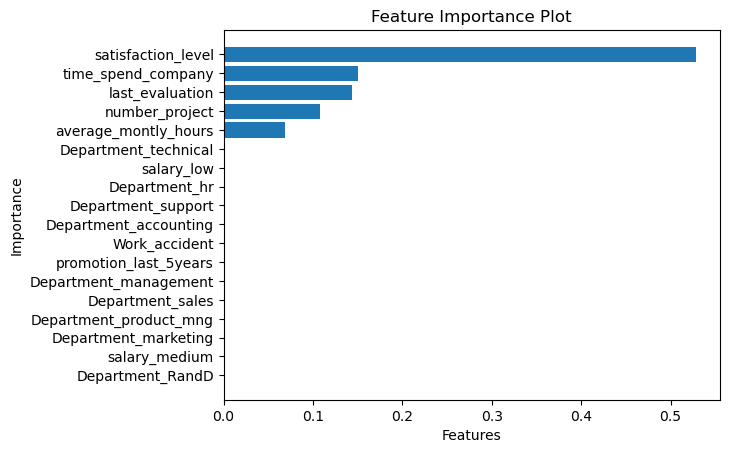

In [52]:
best_tree = DecisionTreeClassifier(random_state=25, max_depth=None, min_samples_leaf=1,
                                   min_samples_split=0.01)
best_tree.fit(X, y)
df_imp = pd.DataFrame({'Feature':list(X.columns), 'Importance': best_tree.feature_importances_}) 
df_imp = df_imp.sort_values('Importance')
plt.barh(df_imp['Feature'], df_imp['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title('Feature Importance Plot')
plt.show()


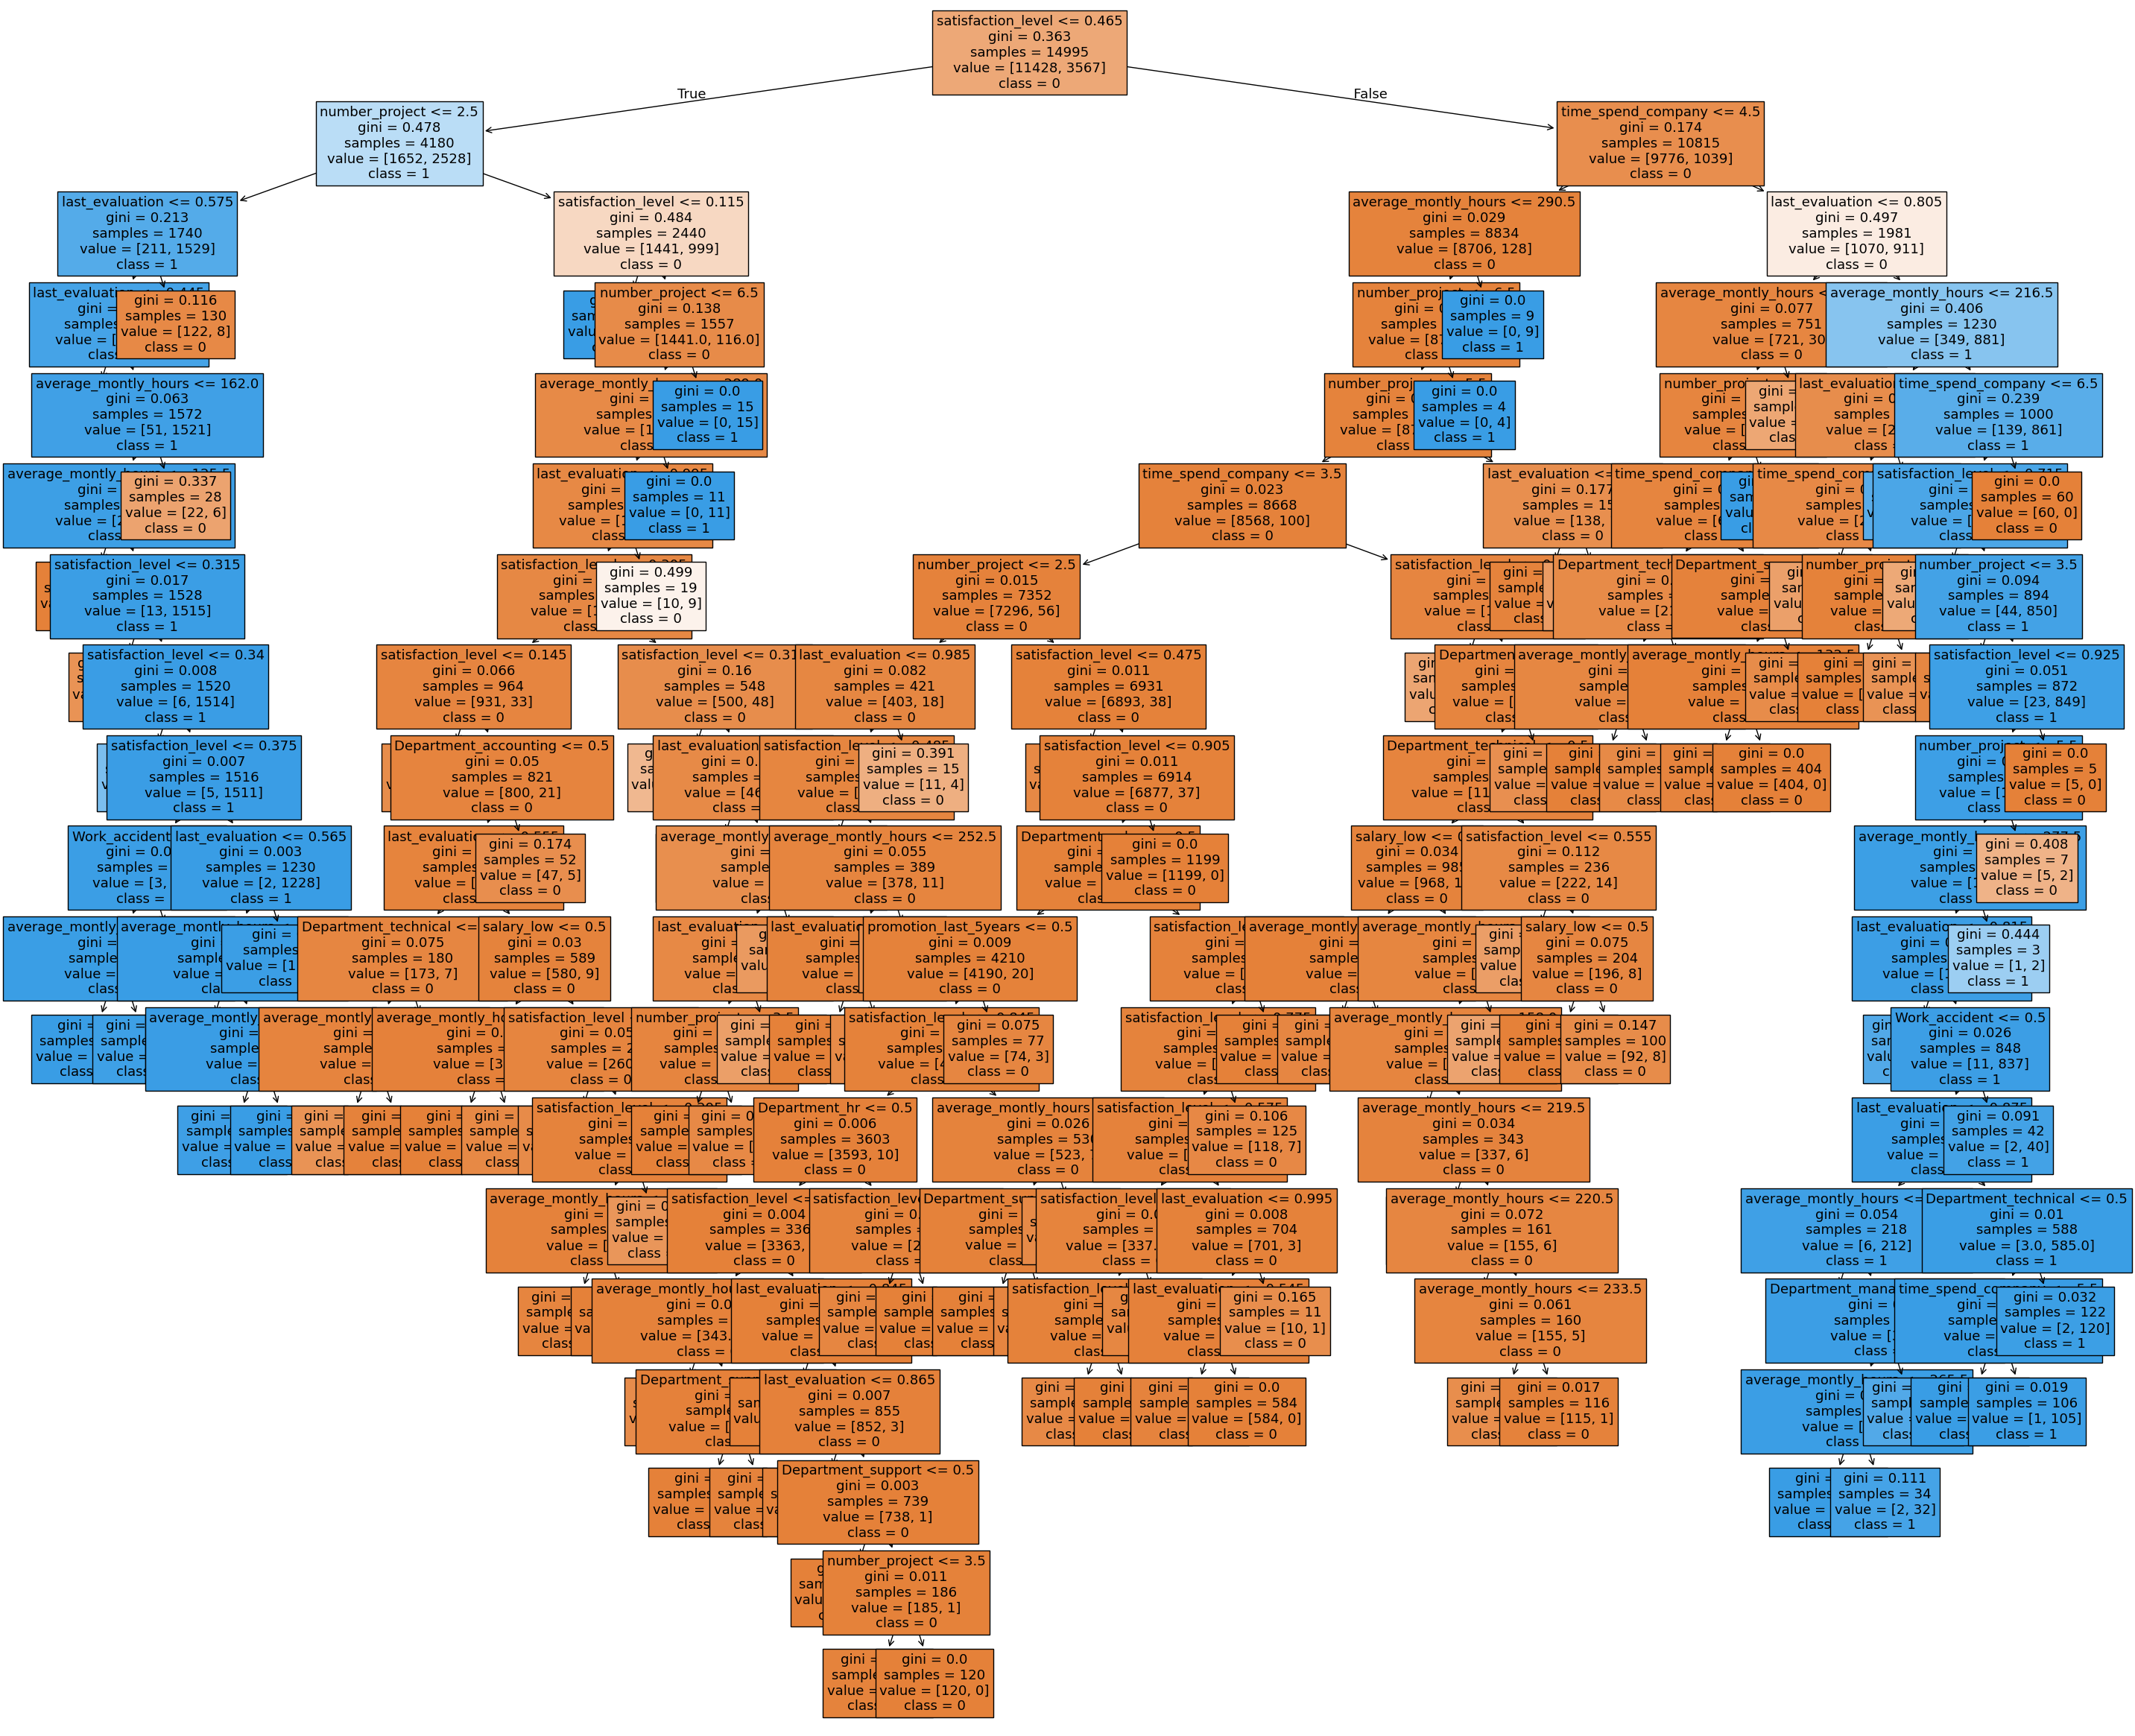

In [53]:
plt.figure(figsize=(35,30))
plot_tree(best_tree, feature_names=list(X.columns),
               class_names=['0','1'],
               filled=True,fontsize=13)
plt.show() 

#### Glass Identification

In [54]:
glass = pd.read_csv("D:/Training/Academy/ML(Python)/Cases/Glass_Identification/Glass.csv")
X, y = glass.drop('Type', axis=1), glass['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                   stratify=y)

In [55]:
depths = [None, 3, 4,5,6,7]
min_samples = [2, 10, 0.025, 0.01 ,0.05, 0.1]
min_leaf = [1, 10, 0.025, 0.01 ,0.05, 0.1]
scores = []
for d in tqdm( depths ):
    for s in min_samples:
        for f in min_leaf:
            dtc = DecisionTreeClassifier(random_state=25, 
                    max_depth=d, min_samples_split=s, min_samples_leaf=f)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)
            scores.append([d,s,f,f1_score(y_test, y_pred, average='macro')])
df_scores = pd.DataFrame( scores, columns=['depth','min-samples','min-leaves','score'] )
df_scores.sort_values('score', ascending=False)

100%|██████████| 6/6 [00:01<00:00,  5.32it/s]


,depth,min-samples,min-leaves,score
6,NaN,10.00,1.00,0.708406
168,6.0,0.05,1.00,0.699943
114,5.0,10.00,1.00,0.676701
117,5.0,10.00,0.01,0.676701
9,NaN,10.00,0.01,0.672555
...,...,...,...,...
167,6.0,0.01,0.10,0.464236
179,6.0,0.10,0.10,0.464236
137,5.0,0.05,0.10,0.464236
11,NaN,10.00,0.10,0.464236


Feature Importance

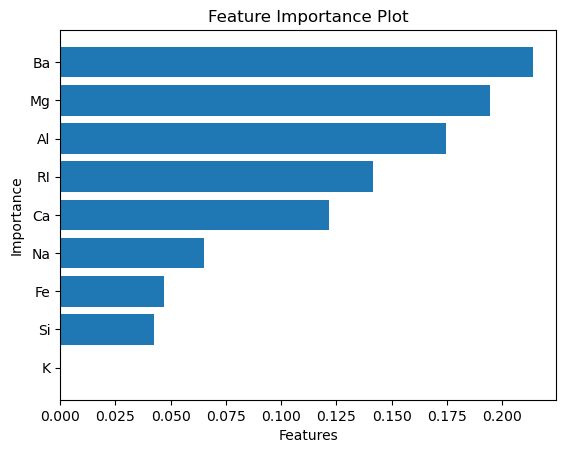

In [56]:
best_tree = DecisionTreeClassifier(random_state=25, max_depth=None, min_samples_leaf=1,
                                   min_samples_split=10)
best_tree.fit(X, y)
df_imp = pd.DataFrame({'Feature':list(X.columns), 'Importance': best_tree.feature_importances_}) 
df_imp = df_imp.sort_values('Importance')
plt.barh(df_imp['Feature'], df_imp['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title('Feature Importance Plot')
plt.show()